In [1]:
test_url='https://huggingface.co/datasets/stanfordnlp/sentiment140/resolve/refs%2Fconvert%2Fparquet/sentiment140/test/0000.parquet'
!wget {test_url}

train_url='https://huggingface.co/datasets/stanfordnlp/sentiment140/resolve/refs%2Fconvert%2Fparquet/sentiment140/train/0000.parquet'
!wget {train_url

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import requests

test_url = "https://huggingface.co/datasets/stanfordnlp/sentiment140/resolve/refs%2Fconvert%2Fparquet/sentiment140/test/0000.parquet"
train_url = "https://huggingface.co/datasets/stanfordnlp/sentiment140/resolve/refs%2Fconvert%2Fparquet/sentiment140/train/0000.parquet"

# Download test file
with open("test.parquet", "wb") as f:
    f.write(requests.get(test_url).content)

# Download train file
with open("train.parquet", "wb") as f:
    f.write(requests.get(train_url).content)

print("Download completed successfully!")


Download completed successfully!


In [3]:
import pandas as pd
df_raw = pd.read_parquet('C:/Users/Shankar/jupyter notes/train.parquet')
df_raw.info()
df_raw

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   text       1600000 non-null  object
 1   date       1600000 non-null  object
 2   user       1600000 non-null  object
 3   sentiment  1600000 non-null  int32 
 4   query      1600000 non-null  object
dtypes: int32(1), object(4)
memory usage: 54.9+ MB


,text,date,user,sentiment,query
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,0,NO_QUERY
1,is upset that he can't update his Facebook by ...,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,0,NO_QUERY
2,@Kenichan I dived many times for the ball. Man...,Mon Apr 06 22:19:53 PDT 2009,mattycus,0,NO_QUERY
3,my whole body feels itchy and like its on fire,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,0,NO_QUERY
4,"@nationwideclass no, it's not behaving at all....",Mon Apr 06 22:19:57 PDT 2009,Karoli,0,NO_QUERY
...,...,...,...,...,...
1599995,Just woke up. Having no school is the best fee...,Tue Jun 16 08:40:49 PDT 2009,AmandaMarie1028,4,NO_QUERY
1599996,TheWDB.com - Very cool to hear old Walt interv...,Tue Jun 16 08:40:49 PDT 2009,TheWDBoards,4,NO_QUERY
1599997,Are you ready for your MoJo Makeover? Ask me f...,Tue Jun 16 08:40:49 PDT 2009,bpbabe,4,NO_QUERY
1599998,Happy 38th Birthday to my boo of alll time!!! ...,Tue Jun 16 08:40:49 PDT 2009,tinydiamondz,4,NO_QUERY


In [4]:
df_raw['sentiment'].value_counts()

sentiment
0    800000
4    800000
Name: count, dtype: int64

In [5]:
df_raw['query'].value_counts()

query
NO_QUERY    1600000
Name: count, dtype: int64

In [6]:
df_raw['user'].value_counts()

user
lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
                  ... 
67trinity            1
Sibby                1
mAnyA_15             1
49ersfan111          1
bpbabe               1
Name: count, Length: 659775, dtype: int64

In [7]:
df_raw.isnull().sum()/1600000 *100

text         0.0
date         0.0
user         0.0
sentiment    0.0
query        0.0
dtype: float64

In [8]:
df_raw['date']=pd.to_datetime(df_raw['date'])
df_raw.info()

C:\Users\Shankar\AppData\Local\Temp\ipykernel_24728\3005188687.py:1: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df_raw['date']=pd.to_datetime(df_raw['date'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   text       1600000 non-null  object        
 1   date       1600000 non-null  datetime64[ns]
 2   user       1600000 non-null  object        
 3   sentiment  1600000 non-null  int32         
 4   query      1600000 non-null  object        
dtypes: datetime64[ns](1), int32(1), object(3)
memory usage: 54.9+ MB


In [9]:
df_raw.head()

,text,date,user,sentiment,query
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009-04-06 22:19:45,_TheSpecialOne_,0,NO_QUERY
1,is upset that he can't update his Facebook by ...,2009-04-06 22:19:49,scotthamilton,0,NO_QUERY
2,@Kenichan I dived many times for the ball. Man...,2009-04-06 22:19:53,mattycus,0,NO_QUERY
3,my whole body feels itchy and like its on fire,2009-04-06 22:19:57,ElleCTF,0,NO_QUERY
4,"@nationwideclass no, it's not behaving at all....",2009-04-06 22:19:57,Karoli,0,NO_QUERY


In [10]:
df = df_raw.copy()

In [11]:
df

,text,date,user,sentiment,query
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009-04-06 22:19:45,_TheSpecialOne_,0,NO_QUERY
1,is upset that he can't update his Facebook by ...,2009-04-06 22:19:49,scotthamilton,0,NO_QUERY
2,@Kenichan I dived many times for the ball. Man...,2009-04-06 22:19:53,mattycus,0,NO_QUERY
3,my whole body feels itchy and like its on fire,2009-04-06 22:19:57,ElleCTF,0,NO_QUERY
4,"@nationwideclass no, it's not behaving at all....",2009-04-06 22:19:57,Karoli,0,NO_QUERY
...,...,...,...,...,...
1599995,Just woke up. Having no school is the best fee...,2009-06-16 08:40:49,AmandaMarie1028,4,NO_QUERY
1599996,TheWDB.com - Very cool to hear old Walt interv...,2009-06-16 08:40:49,TheWDBoards,4,NO_QUERY
1599997,Are you ready for your MoJo Makeover? Ask me f...,2009-06-16 08:40:49,bpbabe,4,NO_QUERY
1599998,Happy 38th Birthday to my boo of alll time!!! ...,2009-06-16 08:40:49,tinydiamondz,4,NO_QUERY


In [12]:
df["label"] = df["sentiment"].apply(lambda x: 1 if x == 4 else 0)


In [13]:
df.head()

,text,date,user,sentiment,query,label
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009-04-06 22:19:45,_TheSpecialOne_,0,NO_QUERY,0
1,is upset that he can't update his Facebook by ...,2009-04-06 22:19:49,scotthamilton,0,NO_QUERY,0
2,@Kenichan I dived many times for the ball. Man...,2009-04-06 22:19:53,mattycus,0,NO_QUERY,0
3,my whole body feels itchy and like its on fire,2009-04-06 22:19:57,ElleCTF,0,NO_QUERY,0
4,"@nationwideclass no, it's not behaving at all....",2009-04-06 22:19:57,Karoli,0,NO_QUERY,0


In [14]:
df['label'].value_counts()

label
0    800000
1    800000
Name: count, dtype: int64

In [15]:
print(df.loc[0, 'text'])


@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D


In [16]:
print(df.loc[100, 'text'])


 Body Of Missing Northern Calif. Girl Found: Police have found the remains of a missing Northern California girl .. http://tr.im/imji


In [17]:
print(df.loc[1000, 'text'])


@JonathanRKnight @silver_tulip27 Um, that would be a hell no to the fugly poker dog pants on the cruise!  Hi Jonathan, sorry I missed you 


In [18]:
import re
import pandas as pd

def clean_text(text: str) -> str:
    """
    Cleans raw social media text using Regex.
    Removes URLs, mentions, hashtags, special characters.
    """

    text = text.lower()
    text = re.sub(r"http\S+", "", text)              # Remove URLs
    text = re.sub(r"@\w+", "", text)                 # Remove mentions
    text = re.sub(r"#\w+", "", text)                 # Remove hashtags
    text = re.sub(r"[^a-zA-Z\s]", "", text)          # Remove special chars
    text = re.sub(r"\s+", " ", text).strip()         # Remove extra spaces

    return text


df["clean_text"] = df["text"].apply(clean_text)



In [19]:
df.head()

,text,date,user,sentiment,query,label,clean_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009-04-06 22:19:45,_TheSpecialOne_,0,NO_QUERY,0,awww thats a bummer you shoulda got david carr...
1,is upset that he can't update his Facebook by ...,2009-04-06 22:19:49,scotthamilton,0,NO_QUERY,0,is upset that he cant update his facebook by t...
2,@Kenichan I dived many times for the ball. Man...,2009-04-06 22:19:53,mattycus,0,NO_QUERY,0,i dived many times for the ball managed to sav...
3,my whole body feels itchy and like its on fire,2009-04-06 22:19:57,ElleCTF,0,NO_QUERY,0,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....",2009-04-06 22:19:57,Karoli,0,NO_QUERY,0,no its not behaving at all im mad why am i her...


In [20]:
print(df.loc[0, 'clean_text'])

awww thats a bummer you shoulda got david carr of third day to do it d


In [21]:
print(df.loc[100, 'clean_text'])

body of missing northern calif girl found police have found the remains of a missing northern california girl


In [22]:
print(df.loc[1000, 'clean_text'])

um that would be a hell no to the fugly poker dog pants on the cruise hi jonathan sorry i missed you


In [23]:
import nltk
from nltk.tokenize import word_tokenize

df["tokens"] = df["clean_text"].apply(word_tokenize)

In [24]:
df.head()

,text,date,user,sentiment,query,label,clean_text,tokens
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009-04-06 22:19:45,_TheSpecialOne_,0,NO_QUERY,0,awww thats a bummer you shoulda got david carr...,"[awww, thats, a, bummer, you, shoulda, got, da..."
1,is upset that he can't update his Facebook by ...,2009-04-06 22:19:49,scotthamilton,0,NO_QUERY,0,is upset that he cant update his facebook by t...,"[is, upset, that, he, cant, update, his, faceb..."
2,@Kenichan I dived many times for the ball. Man...,2009-04-06 22:19:53,mattycus,0,NO_QUERY,0,i dived many times for the ball managed to sav...,"[i, dived, many, times, for, the, ball, manage..."
3,my whole body feels itchy and like its on fire,2009-04-06 22:19:57,ElleCTF,0,NO_QUERY,0,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its..."
4,"@nationwideclass no, it's not behaving at all....",2009-04-06 22:19:57,Karoli,0,NO_QUERY,0,no its not behaving at all im mad why am i her...,"[no, its, not, behaving, at, all, im, mad, why..."


In [25]:
print(df.loc[0, 'tokens'])

['awww', 'thats', 'a', 'bummer', 'you', 'shoulda', 'got', 'david', 'carr', 'of', 'third', 'day', 'to', 'do', 'it', 'd']


In [26]:
print("Maximum word length:", df["tokens"].max())

Maximum word length: ['zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz', 'so', 'tired', 'good', 'night', 'hokies']


In [27]:
from gensim.models import Word2Vec

w2v_model = Word2Vec(
    sentences=df["tokens"],
    vector_size=100,
    window=5,
    min_count=5,
    workers=4
)


In [28]:
print(w2v_model.wv["good"])


[-0.05764847  1.2179172  -2.0870967  -1.8278674   1.448806    2.520887
  1.1851085   1.1878682   0.6938515  -1.3907361   1.1895782  -0.81838405
 -0.12059942 -1.7981179   1.1317585   3.1527028   2.3014019  -0.5633985
 -1.0595129  -0.17184451 -0.65342844  1.0808474  -0.0563099   1.5426819
  0.65265065 -2.5495212  -2.3125699  -0.8194219  -0.75525886  2.3266478
  0.82207    -0.12802014 -0.9606862   1.94738     0.09514434  4.0243573
  0.2981105  -0.77583385 -3.1272452   1.6652484  -0.17857382  0.70227647
 -2.3965316  -2.7354324   0.24838248  0.13920514  1.4041624   3.2865646
 -0.40795314  1.4589337  -1.7933886  -2.0992112  -0.5562843  -1.5379859
 -1.1550845   4.026321   -1.9178445  -0.10803242  2.1119876   1.0459737
 -1.8143882   1.1511327   2.4531667   2.4125612  -0.5837181  -0.6448249
 -0.4986799  -1.1164626   0.9951351   1.0713347   2.3738608  -1.6817898
  0.00407741  0.26610273  1.8944156  -3.5769591   1.3248211  -1.6828715
 -0.7569457   0.7770942   0.97900283 -2.5583293  -0.33252564  0

In [29]:
print(len(w2v_model.wv["good"]))


100


In [30]:
df

,text,date,user,sentiment,query,label,clean_text,tokens
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009-04-06 22:19:45,_TheSpecialOne_,0,NO_QUERY,0,awww thats a bummer you shoulda got david carr...,"[awww, thats, a, bummer, you, shoulda, got, da..."
1,is upset that he can't update his Facebook by ...,2009-04-06 22:19:49,scotthamilton,0,NO_QUERY,0,is upset that he cant update his facebook by t...,"[is, upset, that, he, cant, update, his, faceb..."
2,@Kenichan I dived many times for the ball. Man...,2009-04-06 22:19:53,mattycus,0,NO_QUERY,0,i dived many times for the ball managed to sav...,"[i, dived, many, times, for, the, ball, manage..."
3,my whole body feels itchy and like its on fire,2009-04-06 22:19:57,ElleCTF,0,NO_QUERY,0,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its..."
4,"@nationwideclass no, it's not behaving at all....",2009-04-06 22:19:57,Karoli,0,NO_QUERY,0,no its not behaving at all im mad why am i her...,"[no, its, not, behaving, at, all, im, mad, why..."
...,...,...,...,...,...,...,...,...
1599995,Just woke up. Having no school is the best fee...,2009-06-16 08:40:49,AmandaMarie1028,4,NO_QUERY,1,just woke up having no school is the best feel...,"[just, woke, up, having, no, school, is, the, ..."
1599996,TheWDB.com - Very cool to hear old Walt interv...,2009-06-16 08:40:49,TheWDBoards,4,NO_QUERY,1,thewdbcom very cool to hear old walt interviews,"[thewdbcom, very, cool, to, hear, old, walt, i..."
1599997,Are you ready for your MoJo Makeover? Ask me f...,2009-06-16 08:40:49,bpbabe,4,NO_QUERY,1,are you ready for your mojo makeover ask me fo...,"[are, you, ready, for, your, mojo, makeover, a..."
1599998,Happy 38th Birthday to my boo of alll time!!! ...,2009-06-16 08:40:49,tinydiamondz,4,NO_QUERY,1,happy th birthday to my boo of alll time tupac...,"[happy, th, birthday, to, my, boo, of, alll, t..."


In [31]:
import numpy as np

def get_sentence_vector(tokens, w2v_model):
    vectors = []

    for word in tokens:
        if word in w2v_model.wv:
            vectors.append(w2v_model.wv[word])

    if len(vectors) == 0:
        return np.zeros(w2v_model.vector_size)

    return np.mean(vectors, axis=0)


In [32]:
df["vector"] = df["tokens"].apply(
    lambda x: get_sentence_vector(x, w2v_model)
)


In [33]:
df

,text,date,user,sentiment,query,label,clean_text,tokens,vector
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009-04-06 22:19:45,_TheSpecialOne_,0,NO_QUERY,0,awww thats a bummer you shoulda got david carr...,"[awww, thats, a, bummer, you, shoulda, got, da...","[0.09533647, -0.17576803, 0.40726805, -0.21894..."
1,is upset that he can't update his Facebook by ...,2009-04-06 22:19:49,scotthamilton,0,NO_QUERY,0,is upset that he cant update his facebook by t...,"[is, upset, that, he, cant, update, his, faceb...","[0.023044359, 0.41610914, 0.09532194, 0.570540..."
2,@Kenichan I dived many times for the ball. Man...,2009-04-06 22:19:53,mattycus,0,NO_QUERY,0,i dived many times for the ball managed to sav...,"[i, dived, many, times, for, the, ball, manage...","[0.6527309, -0.73686314, -0.67383206, 0.154007..."
3,my whole body feels itchy and like its on fire,2009-04-06 22:19:57,ElleCTF,0,NO_QUERY,0,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...","[-0.655455, -0.83517474, -0.44629893, 0.336036..."
4,"@nationwideclass no, it's not behaving at all....",2009-04-06 22:19:57,Karoli,0,NO_QUERY,0,no its not behaving at all im mad why am i her...,"[no, its, not, behaving, at, all, im, mad, why...","[0.18924785, -0.10241173, 0.15106748, -0.19209..."
...,...,...,...,...,...,...,...,...,...
1599995,Just woke up. Having no school is the best fee...,2009-06-16 08:40:49,AmandaMarie1028,4,NO_QUERY,1,just woke up having no school is the best feel...,"[just, woke, up, having, no, school, is, the, ...","[0.04535452, -0.686018, 0.0024564103, -0.22984..."
1599996,TheWDB.com - Very cool to hear old Walt interv...,2009-06-16 08:40:49,TheWDBoards,4,NO_QUERY,1,thewdbcom very cool to hear old walt interviews,"[thewdbcom, very, cool, to, hear, old, walt, i...","[0.06723785, 0.39050177, 0.34667274, -0.163237..."
1599997,Are you ready for your MoJo Makeover? Ask me f...,2009-06-16 08:40:49,bpbabe,4,NO_QUERY,1,are you ready for your mojo makeover ask me fo...,"[are, you, ready, for, your, mojo, makeover, a...","[1.0027775, -0.64406693, -0.48364574, -0.47099..."
1599998,Happy 38th Birthday to my boo of alll time!!! ...,2009-06-16 08:40:49,tinydiamondz,4,NO_QUERY,1,happy th birthday to my boo of alll time tupac...,"[happy, th, birthday, to, my, boo, of, alll, t...","[0.4033374, 0.16173649, 0.17296933, -0.0745555..."


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words='english',   # 🔥 important
    max_df=0.85,            # remove very common words
    min_df=5                # remove rare words
)

X_tfidf = vectorizer.fit_transform(df["clean_text"])


In [35]:
print(X_tfidf.shape)


(1600000, 5000)


In [36]:
#finding k by elbow method

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score
from sklearn.decomposition import PCA

inertias = []
k_range = range(2,9)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300 )
    labels = kmeans.fit_predict(X_tfidf)
    inertias.append(kmeans.inertia_)

In [37]:
inertias

[1552244.5313791414,
 1546968.2337815021,
 1538749.8847748197,
 1534225.8454699423,
 1529329.6436141839,
 1526762.340781623,
 1523214.0583493682]

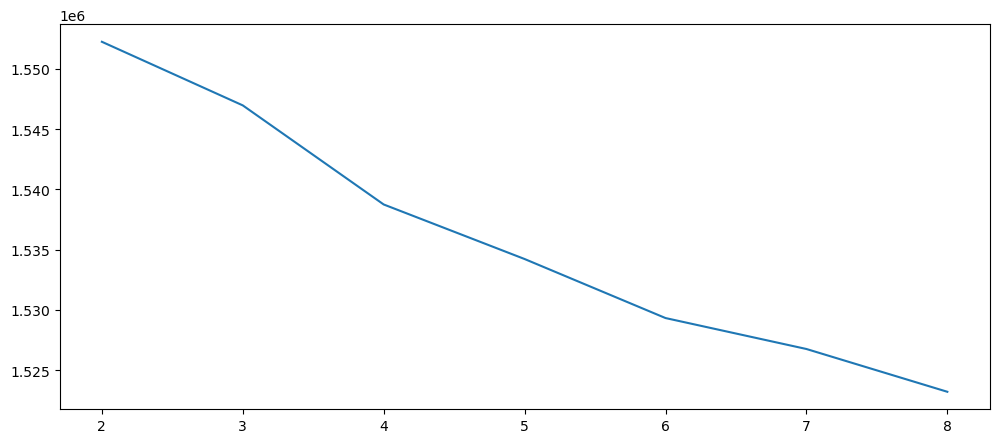

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize= (12,5))
plt.plot(k_range,inertias)

In [39]:
#silhouette_scores (Higher silhouette score is better)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score
from sklearn.decomposition import PCA


silhouette_scores = []

k_range = range(2,9)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300 )
    labels = kmeans.fit_predict(X_tfidf)
    silhouette_scores.append(silhouette_score(X_tfidf, labels, sample_size=50000))

In [40]:
silhouette_scores

[0.007994642759668475,
 0.008613538340619637,
 0.010840990390705197,
 0.011886684572712846,
 0.01184656690184533,
 0.012864117163637284,
 0.014087147058159026]

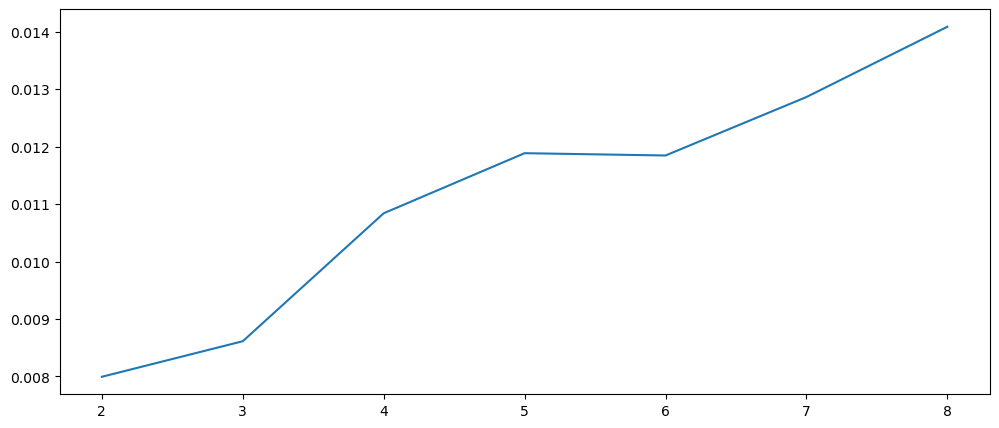

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize= (12,5))
plt.plot(k_range,silhouette_scores)

In [42]:
import numpy as np
from sklearn.metrics import davies_bouldin_score

# Take random sample (e.g., 20000 rows)
sample_size = 20000

indices = np.random.choice(X_tfidf.shape[0], sample_size, replace=False)

X_sample = X_tfidf[indices].toarray()   # convert ONLY sample
labels_sample = labels[indices]

db = davies_bouldin_score(X_sample, labels_sample)

print("Davies-Bouldin Score:", db)


Davies-Bouldin Score: 6.976827228884698


In [43]:
from sklearn.cluster import KMeans
db_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_tfidf)

    sample_idx = np.random.choice(X_tfidf.shape[0], 20000, replace=False)
    X_sample = X_tfidf[sample_idx].toarray()
    labels_sample = labels[sample_idx]

    db = davies_bouldin_score(X_sample, labels_sample)
    db_scores.append(db)

print(db_scores)


[8.255856095395318, 8.42375063440221, 7.875888071253479, 7.319476828167934, 6.974445265289112, 6.836009737163669, 6.52275684233093, 6.917672129276686]


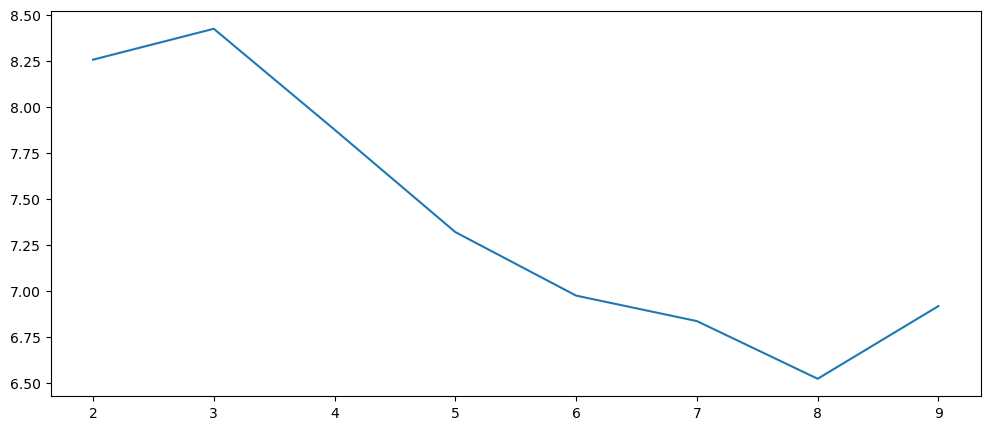

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize= (12,5))
plt.plot(range(2, 10),db_scores)

In [45]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score


ch_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_tfidf)

    sample_idx = np.random.choice(X_tfidf.shape[0], 20000, replace=False)
    X_sample = X_tfidf[sample_idx].toarray()
    labels_sample = labels[sample_idx]

    ch = calinski_harabasz_score(X_sample, labels_sample)
    ch_scores.append(ch)

print(ch_scores)

[104.38596948887941, 87.17210860100201, 76.63466342919351, 75.95598136766186, 72.8955113799318, 73.11359592824456, 70.9733305174663, 63.39644134733663]


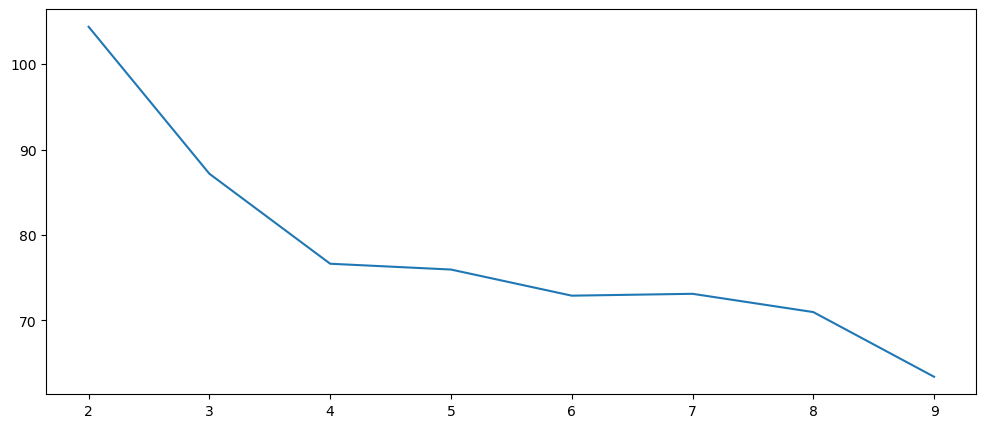

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize= (12,5))
plt.plot(range(2, 10),ch_scores)

In [47]:
kmeans_final = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans_final.fit_predict(X_tfidf)

In [48]:
df['cluster'] = y_kmeans

In [49]:
df

,text,date,user,sentiment,query,label,clean_text,tokens,vector,cluster
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009-04-06 22:19:45,_TheSpecialOne_,0,NO_QUERY,0,awww thats a bummer you shoulda got david carr...,"[awww, thats, a, bummer, you, shoulda, got, da...","[0.09533647, -0.17576803, 0.40726805, -0.21894...",0
1,is upset that he can't update his Facebook by ...,2009-04-06 22:19:49,scotthamilton,0,NO_QUERY,0,is upset that he cant update his facebook by t...,"[is, upset, that, he, cant, update, his, faceb...","[0.023044359, 0.41610914, 0.09532194, 0.570540...",0
2,@Kenichan I dived many times for the ball. Man...,2009-04-06 22:19:53,mattycus,0,NO_QUERY,0,i dived many times for the ball managed to sav...,"[i, dived, many, times, for, the, ball, manage...","[0.6527309, -0.73686314, -0.67383206, 0.154007...",0
3,my whole body feels itchy and like its on fire,2009-04-06 22:19:57,ElleCTF,0,NO_QUERY,0,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...","[-0.655455, -0.83517474, -0.44629893, 0.336036...",0
4,"@nationwideclass no, it's not behaving at all....",2009-04-06 22:19:57,Karoli,0,NO_QUERY,0,no its not behaving at all im mad why am i her...,"[no, its, not, behaving, at, all, im, mad, why...","[0.18924785, -0.10241173, 0.15106748, -0.19209...",1
...,...,...,...,...,...,...,...,...,...,...
1599995,Just woke up. Having no school is the best fee...,2009-06-16 08:40:49,AmandaMarie1028,4,NO_QUERY,1,just woke up having no school is the best feel...,"[just, woke, up, having, no, school, is, the, ...","[0.04535452, -0.686018, 0.0024564103, -0.22984...",0
1599996,TheWDB.com - Very cool to hear old Walt interv...,2009-06-16 08:40:49,TheWDBoards,4,NO_QUERY,1,thewdbcom very cool to hear old walt interviews,"[thewdbcom, very, cool, to, hear, old, walt, i...","[0.06723785, 0.39050177, 0.34667274, -0.163237...",0
1599997,Are you ready for your MoJo Makeover? Ask me f...,2009-06-16 08:40:49,bpbabe,4,NO_QUERY,1,are you ready for your mojo makeover ask me fo...,"[are, you, ready, for, your, mojo, makeover, a...","[1.0027775, -0.64406693, -0.48364574, -0.47099...",0
1599998,Happy 38th Birthday to my boo of alll time!!! ...,2009-06-16 08:40:49,tinydiamondz,4,NO_QUERY,1,happy th birthday to my boo of alll time tupac...,"[happy, th, birthday, to, my, boo, of, alll, t...","[0.4033374, 0.16173649, 0.17296933, -0.0745555...",0


In [50]:
import numpy as np

terms = vectorizer.get_feature_names_out()

for i in range(3):   # because clusters = 3
    center = kmeans_final.cluster_centers_[i]
    
    # Get indices of top 10 words
    top_indices = center.argsort()[-10:][::-1]
    
    print(f"\nCluster {i} Top Words:")
    print([terms[ind] for ind in top_indices])



Cluster 0 Top Words:
['just', 'good', 'day', 'work', 'like', 'today', 'got', 'thanks', 'going', 'time']

Cluster 1 Top Words:
['im', 'going', 'just', 'sorry', 'gonna', 'good', 'like', 'lol', 'work', 'tired']

Cluster 2 Top Words:
['love', 'dont', 'know', 'want', 'like', 'just', 'think', 'really', 'feel', 'good']


In [51]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=42)
df_pca = pca.fit_transform(X_tfidf)


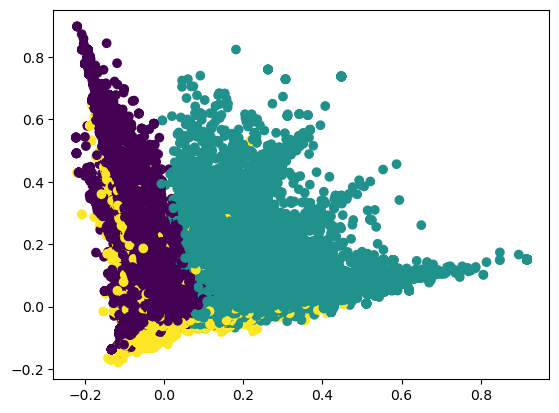

In [52]:
plt.scatter(df_pca[:,0],df_pca[:,1],c=y_kmeans)

In [53]:
df['cluster'].value_counts()


cluster
0    1326553
1     160526
2     112921
Name: count, dtype: int64

In [54]:
df.head()

,text,date,user,sentiment,query,label,clean_text,tokens,vector,cluster
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009-04-06 22:19:45,_TheSpecialOne_,0,NO_QUERY,0,awww thats a bummer you shoulda got david carr...,"[awww, thats, a, bummer, you, shoulda, got, da...","[0.09533647, -0.17576803, 0.40726805, -0.21894...",0
1,is upset that he can't update his Facebook by ...,2009-04-06 22:19:49,scotthamilton,0,NO_QUERY,0,is upset that he cant update his facebook by t...,"[is, upset, that, he, cant, update, his, faceb...","[0.023044359, 0.41610914, 0.09532194, 0.570540...",0
2,@Kenichan I dived many times for the ball. Man...,2009-04-06 22:19:53,mattycus,0,NO_QUERY,0,i dived many times for the ball managed to sav...,"[i, dived, many, times, for, the, ball, manage...","[0.6527309, -0.73686314, -0.67383206, 0.154007...",0
3,my whole body feels itchy and like its on fire,2009-04-06 22:19:57,ElleCTF,0,NO_QUERY,0,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...","[-0.655455, -0.83517474, -0.44629893, 0.336036...",0
4,"@nationwideclass no, it's not behaving at all....",2009-04-06 22:19:57,Karoli,0,NO_QUERY,0,no its not behaving at all im mad why am i her...,"[no, its, not, behaving, at, all, im, mad, why...","[0.18924785, -0.10241173, 0.15106748, -0.19209...",1


In [55]:
#logistic regression


In [56]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [57]:
X = df["clean_text"]          
y = df["label"]         

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [58]:
vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words='english',
    ngram_range=(1,2),   # unigrams + bigrams
    max_df=0.9,
    min_df=5
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [59]:
model = LogisticRegression(max_iter=1000)

model.fit(X_train_tfidf, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [60]:
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.767140625

Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.74      0.76    160000
           1       0.75      0.80      0.77    160000

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



In [61]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))


[[118164  41836]
 [ 32679 127321]]


In [62]:
from sklearn.metrics import roc_auc_score, roc_curve
auc_score = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", auc_score)


ROC-AUC Score: 0.7671406250000001


In [63]:
y_test

291262     0
1359075    1
1009651    1
1538714    1
1046690    1
          ..
203556     0
163122     0
1176116    1
477177     0
897066     1
Name: label, Length: 320000, dtype: int64

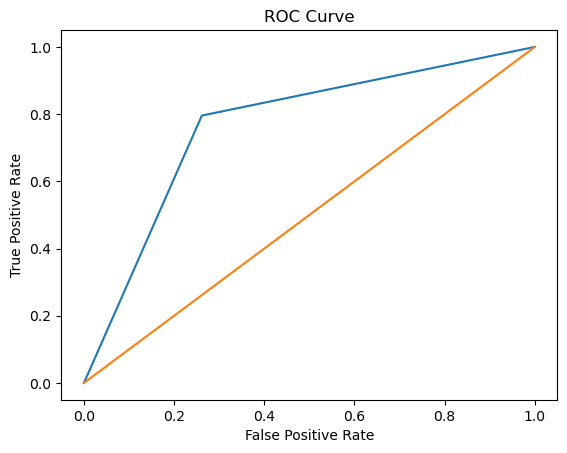

In [64]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])  # random line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [65]:
import pandas as pd

# Get the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the coefficients from the model
coefficients = model.coef_[0]

# Create a DataFrame for easy sorting
feat_importance = pd.DataFrame({'word': feature_names, 'coefficient': coefficients})

# Top 10 Positive Words (Highest coefficients)
print("Top Positive Words:")
print(feat_importance.sort_values(by='coefficient', ascending=False).head(10))

# Top 10 Negative Words (Lowest coefficients)
print("\nTop Negative Words:")
print(feat_importance.sort_values(by='coefficient', ascending=True).head(10))

Top Positive Words:
                 word  coefficient
4813        wish luck     4.683631
743   congratulations     4.409350
4272            thank     4.235673
4277           thanks     4.118523
3911            smile     4.057935
3433            proud     3.692969
3914          smiling     3.421147
387           blessed     3.417607
1566             glad     3.414650
3323         pleasure     3.394829

Top Negative Words:
               word  coefficient
3680            sad    -8.787580
3686          sadly    -6.279745
504          bummed    -6.023654
1759         gutted    -5.574399
4585  unfortunately    -5.572369
3634            rip    -5.529656
1016   disappointed    -5.447451
2870           miss    -5.440475
957      depressing    -5.292644
998            died    -5.261388


In [66]:
import re

def label_constructive(text):
    
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r"http\S+", "", text)
    
    # Remove mentions
    text = re.sub(r"@\w+", "", text)
    
    # Extract meaningful words (3+ letters)
    words = re.findall(r'\b[a-z]{3,}\b', text)
    
    if len(words) >= 3:
        return 1   # Constructive
    else:
        return 0   # Noise


In [67]:
df["constructive_label"] = df["text"].apply(label_constructive)


In [68]:
df


,text,date,user,sentiment,query,label,clean_text,tokens,vector,cluster,constructive_label
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009-04-06 22:19:45,_TheSpecialOne_,0,NO_QUERY,0,awww thats a bummer you shoulda got david carr...,"[awww, thats, a, bummer, you, shoulda, got, da...","[0.09533647, -0.17576803, 0.40726805, -0.21894...",0,1
1,is upset that he can't update his Facebook by ...,2009-04-06 22:19:49,scotthamilton,0,NO_QUERY,0,is upset that he cant update his facebook by t...,"[is, upset, that, he, cant, update, his, faceb...","[0.023044359, 0.41610914, 0.09532194, 0.570540...",0,1
2,@Kenichan I dived many times for the ball. Man...,2009-04-06 22:19:53,mattycus,0,NO_QUERY,0,i dived many times for the ball managed to sav...,"[i, dived, many, times, for, the, ball, manage...","[0.6527309, -0.73686314, -0.67383206, 0.154007...",0,1
3,my whole body feels itchy and like its on fire,2009-04-06 22:19:57,ElleCTF,0,NO_QUERY,0,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...","[-0.655455, -0.83517474, -0.44629893, 0.336036...",0,1
4,"@nationwideclass no, it's not behaving at all....",2009-04-06 22:19:57,Karoli,0,NO_QUERY,0,no its not behaving at all im mad why am i her...,"[no, its, not, behaving, at, all, im, mad, why...","[0.18924785, -0.10241173, 0.15106748, -0.19209...",1,1
...,...,...,...,...,...,...,...,...,...,...,...
1599995,Just woke up. Having no school is the best fee...,2009-06-16 08:40:49,AmandaMarie1028,4,NO_QUERY,1,just woke up having no school is the best feel...,"[just, woke, up, having, no, school, is, the, ...","[0.04535452, -0.686018, 0.0024564103, -0.22984...",0,1
1599996,TheWDB.com - Very cool to hear old Walt interv...,2009-06-16 08:40:49,TheWDBoards,4,NO_QUERY,1,thewdbcom very cool to hear old walt interviews,"[thewdbcom, very, cool, to, hear, old, walt, i...","[0.06723785, 0.39050177, 0.34667274, -0.163237...",0,1
1599997,Are you ready for your MoJo Makeover? Ask me f...,2009-06-16 08:40:49,bpbabe,4,NO_QUERY,1,are you ready for your mojo makeover ask me fo...,"[are, you, ready, for, your, mojo, makeover, a...","[1.0027775, -0.64406693, -0.48364574, -0.47099...",0,1
1599998,Happy 38th Birthday to my boo of alll time!!! ...,2009-06-16 08:40:49,tinydiamondz,4,NO_QUERY,1,happy th birthday to my boo of alll time tupac...,"[happy, th, birthday, to, my, boo, of, alll, t...","[0.4033374, 0.16173649, 0.17296933, -0.0745555...",0,1


In [69]:
df['constructive_label'].value_counts()


constructive_label
1    1490577
0     109423
Name: count, dtype: int64

In [70]:
model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

model.fit(X_train_tfidf, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [71]:
X_constructive = df["clean_text"]          
y_constructive = df["constructive_label"]         

X_traincon, X_testcon, y_traincon, y_testcon = train_test_split(
    X_constructive, y_constructive,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [72]:
vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words='english',
    ngram_range=(1,2),   # unigrams + bigrams
    max_df=0.9,
    min_df=5
)

X_train_constructive = vectorizer.fit_transform(X_traincon)
X_test_constructive = vectorizer.transform(X_testcon)

In [73]:
model_constructive = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

model_constructive.fit(X_train_constructive, y_traincon)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [74]:
y_pred_con = model_constructive.predict(X_test_constructive)

print("Accuracy:", accuracy_score(y_testcon, y_pred_con))
print("\nClassification Report:\n")
print(classification_report(y_testcon, y_pred_con))

Accuracy: 0.876584375

Classification Report:

              precision    recall  f1-score   support

           0       0.35      0.93      0.51     21938
           1       0.99      0.87      0.93    298062

    accuracy                           0.88    320000
   macro avg       0.67      0.90      0.72    320000
weighted avg       0.95      0.88      0.90    320000



In [75]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_testcon, y_pred_con))



[[ 20451   1487]
 [ 38006 260056]]


In [76]:
y_testcon.value_counts()

constructive_label
1    298062
0     21938
Name: count, dtype: int64

In [77]:
y_pred_con

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [78]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_testcon, y_pred_con)
print("ROC-AUC:", auc)


ROC-AUC: 0.9023538426790871


In [79]:
sample = ["asdfghjkl",  "How did you evaluate the constructive detection model?","This article provides very useful insights"]

sample_vec = vectorizer.transform(sample)

pred = model_constructive.predict(sample_vec)

print(pred)


[0 1 1]


In [80]:
#word2vec

In [81]:
from gensim.models import Word2Vec

w2vec_model = Word2Vec(
    sentences=df["tokens"],
    vector_size=100,
    window=5,
    min_count=5,
    workers=4
)
 

In [82]:
def get_sequence_vectors(tokens, w2vec_model):
    vectors = []
    
    for word in tokens:
        if word in w2vec_model.wv:
            vectors.append(w2vec_model.wv[word])
    
    return vectors   # IMPORTANT: no averaging


In [83]:
df["sequence_vectors"] = df["tokens"].apply(
    lambda x: get_sequence_vectors(x, w2vec_model)
)


In [84]:
df

,text,date,user,sentiment,query,label,clean_text,tokens,vector,cluster,constructive_label,sequence_vectors
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009-04-06 22:19:45,_TheSpecialOne_,0,NO_QUERY,0,awww thats a bummer you shoulda got david carr...,"[awww, thats, a, bummer, you, shoulda, got, da...","[0.09533647, -0.17576803, 0.40726805, -0.21894...",0,1,"[[-0.09679181, 1.4561714, 1.3358545, -0.045389..."
1,is upset that he can't update his Facebook by ...,2009-04-06 22:19:49,scotthamilton,0,NO_QUERY,0,is upset that he cant update his facebook by t...,"[is, upset, that, he, cant, update, his, faceb...","[0.023044359, 0.41610914, 0.09532194, 0.570540...",0,1,"[[0.055220004, -1.2577512, 3.6887925, 0.967541..."
2,@Kenichan I dived many times for the ball. Man...,2009-04-06 22:19:53,mattycus,0,NO_QUERY,0,i dived many times for the ball managed to sav...,"[i, dived, many, times, for, the, ball, manage...","[0.6527309, -0.73686314, -0.67383206, 0.154007...",0,1,"[[0.21987207, -1.3871639, -1.0842578, -1.65326..."
3,my whole body feels itchy and like its on fire,2009-04-06 22:19:57,ElleCTF,0,NO_QUERY,0,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...","[-0.655455, -0.83517474, -0.44629893, 0.336036...",0,1,"[[0.3476261, -0.22113872, -3.4761486, 1.768325..."
4,"@nationwideclass no, it's not behaving at all....",2009-04-06 22:19:57,Karoli,0,NO_QUERY,0,no its not behaving at all im mad why am i her...,"[no, its, not, behaving, at, all, im, mad, why...","[0.18924785, -0.10241173, 0.15106748, -0.19209...",1,1,"[[0.9876889, -0.7463178, -3.0194705, 1.6823485..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1599995,Just woke up. Having no school is the best fee...,2009-06-16 08:40:49,AmandaMarie1028,4,NO_QUERY,1,just woke up having no school is the best feel...,"[just, woke, up, having, no, school, is, the, ...","[0.04535452, -0.686018, 0.0024564103, -0.22984...",0,1,"[[0.028275905, 0.86617655, -0.9401457, -1.4269..."
1599996,TheWDB.com - Very cool to hear old Walt interv...,2009-06-16 08:40:49,TheWDBoards,4,NO_QUERY,1,thewdbcom very cool to hear old walt interviews,"[thewdbcom, very, cool, to, hear, old, walt, i...","[0.06723785, 0.39050177, 0.34667274, -0.163237...",0,1,"[[-0.93935335, 0.2856159, 0.6826953, -1.402764..."
1599997,Are you ready for your MoJo Makeover? Ask me f...,2009-06-16 08:40:49,bpbabe,4,NO_QUERY,1,are you ready for your mojo makeover ask me fo...,"[are, you, ready, for, your, mojo, makeover, a...","[1.0027775, -0.64406693, -0.48364574, -0.47099...",0,1,"[[2.9606783, -4.300529, 2.6849449, 0.017392054..."
1599998,Happy 38th Birthday to my boo of alll time!!! ...,2009-06-16 08:40:49,tinydiamondz,4,NO_QUERY,1,happy th birthday to my boo of alll time tupac...,"[happy, th, birthday, to, my, boo, of, alll, t...","[0.4033374, 0.16173649, 0.17296933, -0.0745555...",0,1,"[[1.1203108, -0.2865088, -0.019115439, -0.2664..."


In [85]:
#lstm

In [86]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter
import re


In [87]:

#Train-Test Split

In [88]:
X_lstm = df["sequence_vectors"]
y_lstm = df["label"]

X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    X_lstm, y_lstm, test_size=0.2, random_state=42
)


In [89]:
print(type(X_lstm.iloc[0]))
print(len(X_lstm.iloc[0]))

<class 'list'>
16


In [90]:
print(type(X_lstm.iloc[0]))
print(len(X_lstm.iloc[0]))


<class 'list'>
16


In [91]:
import numpy as np

sample = np.array(X_lstm.iloc[0])
print(sample.shape)


(16, 100)


In [92]:
MAX_LEN = 50   # you can experiment (30, 50, 100)
EMBED_DIM = 100

import numpy as np

def pad_sequences(sequences, max_len, embed_dim):
    padded_sequences = []
    
    for seq in sequences:
        if len(seq) == 0:
            seq = [np.zeros(embed_dim)]
        
        if len(seq) < max_len:
            pad = [np.zeros(embed_dim)] * (max_len - len(seq))
            seq = seq + pad
        else:
            seq = seq[:max_len]
        
        padded_sequences.append(seq)
    
    return np.array(padded_sequences, dtype=np.float32)


In [93]:
class TwitterDataset(torch.utils.data.Dataset):
    def __init__(self, sequences, labels, max_len, embed_dim):
        self.sequences = sequences.values
        self.labels = labels.values
        self.max_len = max_len
        self.embed_dim = embed_dim

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        seq = self.sequences[idx]

        if len(seq) == 0:
            seq = [np.zeros(self.embed_dim)]

        if len(seq) < self.max_len:
            pad = [np.zeros(self.embed_dim)] * (self.max_len - len(seq))
            seq = seq + pad
        else:
            seq = seq[:self.max_len]

        seq = np.array(seq, dtype=np.float32)

        return torch.tensor(seq), torch.tensor(self.labels[idx], dtype=torch.float32)


In [94]:
MAX_LEN = 50
EMBED_DIM = 100

train_dataset = TwitterDataset(X_train_lstm, y_train_lstm, MAX_LEN, EMBED_DIM)
test_dataset = TwitterDataset(X_test_lstm, y_test_lstm, MAX_LEN, EMBED_DIM)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64)


In [95]:
import torch
import torch.nn as nn

class BiLSTMModel(nn.Module):
    def __init__(self, embed_dim, hidden_dim):
        super(BiLSTMModel, self).__init__()
        
        self.lstm = nn.LSTM(
            input_size=embed_dim,
            hidden_size=hidden_dim,
            batch_first=True,
            bidirectional=True   # 🔥 Important
        )
        
        # hidden_dim * 2 because bidirectional
        self.fc1 = nn.Linear(hidden_dim * 2, 128)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        lstm_out, (hidden, cell) = self.lstm(x)
        
        # hidden shape:
        # (num_layers * num_directions, batch_size, hidden_dim)
        # For 1 layer BiLSTM → (2, batch_size, hidden_dim)

        # Concatenate forward & backward hidden states
        hidden_forward = hidden[0]
        hidden_backward = hidden[1]
        hidden_combined = torch.cat((hidden_forward, hidden_backward), dim=1)

        out = self.relu(self.fc1(hidden_combined))
        out = self.dropout(out)
        out = self.sigmoid(self.fc2(out))
        
        return out


In [96]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_bilstm = BiLSTMModel(embed_dim=100, hidden_dim=128).to(device)

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model_bilstm.parameters(), lr=0.001)



E:\GUVI\Newfolder\envs\dl310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [97]:
import torch
print(torch.cuda.is_available())


True


In [98]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

2.2.2
True
NVIDIA GeForce RTX 3050 Laptop GPU


In [99]:
EPOCHS = 5

for epoch in range(EPOCHS):
    
    model_bilstm.train()
    total_loss = 0
    total_correct = 0
    total_samples = 0
    
    for inputs, labels in train_loader:
        
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model_bilstm(inputs).squeeze()
        
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        
        # Calculate accuracy per batch
        preds = (outputs > 0.5).float()
        total_correct += (preds == labels).sum().item()
        total_samples += labels.size(0)
    
    epoch_loss = total_loss / len(train_loader)
    epoch_acc = total_correct / total_samples
    
    print(f"Epoch [{epoch+1}/{EPOCHS}] "
          f"Loss: {epoch_loss:.4f} "
          f"Accuracy: {epoch_acc:.4f}")


Epoch [1/5] Loss: 0.4138 Accuracy: 0.8103
Epoch [2/5] Loss: 0.3848 Accuracy: 0.8267
Epoch [3/5] Loss: 0.3744 Accuracy: 0.8322
Epoch [4/5] Loss: 0.3675 Accuracy: 0.8361
Epoch [5/5] Loss: 0.3634 Accuracy: 0.8380


In [100]:
model_bilstm.eval()

total_correct = 0
total_samples = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        outputs = model_bilstm(inputs).squeeze()
        preds = (outputs > 0.5).float()
        
        total_correct += (preds == labels).sum().item()
        total_samples += labels.size(0)

test_accuracy = total_correct / total_samples
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.8288125


In [101]:
from sklearn.metrics import classification_report

all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        outputs = model_bilstm(inputs).squeeze()
        preds = (outputs > 0.5).float()
        
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print(classification_report(all_labels, all_preds))


              precision    recall  f1-score   support

         0.0       0.83      0.82      0.83    159494
         1.0       0.83      0.84      0.83    160506

    accuracy                           0.83    320000
   macro avg       0.83      0.83      0.83    320000
weighted avg       0.83      0.83      0.83    320000



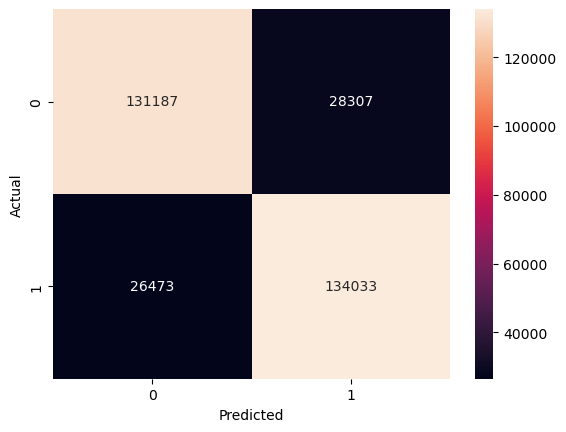

In [102]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(all_labels, all_preds)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


CUDA Available: True
GPU Name: NVIDIA GeForce RTX 3050 Laptop GPU


Using device: cuda


Epoch [1/8] Loss: 0.4079 Accuracy: 0.8136
Epoch [2/8] Loss: 0.3752 Accuracy: 0.8316
Epoch [3/8] Loss: 0.3623 Accuracy: 0.8384
Epoch [4/8] Loss: 0.3394 Accuracy: 0.8501
Epoch [5/8] Loss: 0.3228 Accuracy: 0.8580
Epoch [6/8] Loss: 0.3094 Accuracy: 0.8651
Epoch [7/8] Loss: 0.2823 Accuracy: 0.8782
Epoch [8/8] Loss: 0.2661 Accuracy: 0.8858


Model saved successfully ✅


In [112]:
import torch
import torch.nn as nn

# -----------------------------
# Model
# -----------------------------
class BetterBiLSTM2(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, output_dim=1, num_layers=2, dropout=0.3):
        super().__init__()

        self.lstm = nn.LSTM(
            input_size=embedding_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            bidirectional=True,
            dropout=dropout if num_layers > 1 else 0.0,  # LSTM dropout works only if num_layers>1
        )

        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, x):
        # x: [B, T, embedding_dim]
        _, (hidden, _) = self.lstm(x)

        # hidden: [num_layers*2, B, hidden_dim]
        # Take last layer's forward & backward hidden states
        hidden_forward = hidden[-2]   # [B, hidden_dim]
        hidden_backward = hidden[-1]  # [B, hidden_dim]

        hidden_cat = torch.cat((hidden_forward, hidden_backward), dim=1)  # [B, hidden_dim*2]
        hidden_cat = self.dropout(hidden_cat)

        logits = self.fc(hidden_cat).squeeze(-1)  # [B]
        return logits  # logits (NO sigmoid here)


# -----------------------------
# Device
# -----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -----------------------------
# Hyperparams
# -----------------------------
embedding_dim = 100
hidden_dim = 256
output_dim = 1
EPOCHS = 8
lr = 0.001

# -----------------------------
# Init model/optim/scheduler
# -----------------------------
model_bilstm2 = BetterBiLSTM2(
    embedding_dim=embedding_dim,
    hidden_dim=hidden_dim,
    output_dim=output_dim,
    num_layers=2,
    dropout=0.3
).to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_bilstm2.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)


# -----------------------------
# Training loop (Anger Score)
# -----------------------------
for epoch in range(EPOCHS):
    model_bilstm2.train()

    total_loss = 0.0
    total_correct = 0
    total_samples = 0
    total_score_sum = 0.0  # average anger score tracking (optional)

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device).float().view(-1)  # ensure float + shape [B]

        optimizer.zero_grad()

        logits = model_bilstm2(inputs)               # [B] logits
        loss = criterion(logits, labels)             # BCEWithLogitsLoss expects logits

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model_bilstm2.parameters(), max_norm=1.0)
        optimizer.step()

        total_loss += loss.item()

        # Continuous Anger Score in [0,1]
        anger_scores = torch.sigmoid(logits)         # [B]
        total_score_sum += anger_scores.sum().item()

        # Optional: binary accuracy ONLY as a monitoring metric
        preds = (anger_scores >= 0.5).float()
        total_correct += (preds == labels).sum().item()
        total_samples += labels.size(0)

    scheduler.step()

    epoch_loss = total_loss / len(train_loader)
    epoch_acc = total_correct / total_samples
    epoch_avg_anger = total_score_sum / total_samples  # average predicted anger score

    print(
        f"Epoch [{epoch+1}/{EPOCHS}] "
        f"Loss: {epoch_loss:.4f} "
        f"Acc(0.5-thresh): {epoch_acc:.4f} "
        f"Avg Anger Score: {epoch_avg_anger:.4f}"
    )

Using device: cuda
Epoch [1/8] Loss: 0.4057 Acc(0.5-thresh): 0.8144 Avg Anger Score: 0.4994
Epoch [2/8] Loss: 0.3737 Acc(0.5-thresh): 0.8329 Avg Anger Score: 0.4995
Epoch [3/8] Loss: 0.3608 Acc(0.5-thresh): 0.8390 Avg Anger Score: 0.4997
Epoch [4/8] Loss: 0.3373 Acc(0.5-thresh): 0.8511 Avg Anger Score: 0.4996
Epoch [5/8] Loss: 0.3198 Acc(0.5-thresh): 0.8599 Avg Anger Score: 0.4996
Epoch [6/8] Loss: 0.3056 Acc(0.5-thresh): 0.8668 Avg Anger Score: 0.4996
Epoch [7/8] Loss: 0.2772 Acc(0.5-thresh): 0.8808 Avg Anger Score: 0.4997
Epoch [8/8] Loss: 0.2596 Acc(0.5-thresh): 0.8893 Avg Anger Score: 0.4997


In [113]:
@torch.no_grad()
def predict_anger_score(model, inputs, device=device):
    """
    Returns continuous Anger Score in [0,1] for a batch.
    inputs: [B, T, embedding_dim]
    """
    model.eval()
    inputs = inputs.to(device)
    logits = model(inputs)                 # [B]
    anger_score = torch.sigmoid(logits)    # [B] in [0,1]
    return anger_score.cpu()

In [141]:
import re
import numpy as np
import torch

# ----------------------------
# 1) Simple tokenizer (use YOUR training preprocessing if different)
# ----------------------------
def basic_tokenize(text: str):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", " ", text)      # remove urls
    text = re.sub(r"[^a-z\s]", " ", text)            # keep only letters
    text = re.sub(r"\s+", " ", text).strip()
    return text.split()

# ----------------------------
# 2) Convert text -> [max_len, embedding_dim] using Word2Vec
#    w2v can be gensim.models.Word2Vec (has .wv) OR KeyedVectors directly
# ----------------------------
def text_to_w2v_tensor(text, w2v, max_len, embedding_dim, device):
    tokens = basic_tokenize(text)

    # handle both Word2Vec model and KeyedVectors
    kv = w2v.wv if hasattr(w2v, "wv") else w2v

    vectors = []
    for tok in tokens[:max_len]:
        if tok in kv:
            vectors.append(kv[tok])
        else:
            vectors.append(np.zeros(embedding_dim, dtype=np.float32))  # OOV -> zeros

    # pad if shorter than max_len
    while len(vectors) < max_len:
        vectors.append(np.zeros(embedding_dim, dtype=np.float32))

    arr = np.stack(vectors).astype(np.float32)     # [max_len, embedding_dim]
    x = torch.tensor(arr).unsqueeze(0).to(device)  # [1, max_len, embedding_dim]
    return x

# ----------------------------
# 3) Predict Anger Score
# ----------------------------
@torch.no_grad()
def predict_anger_score_text(model, text, w2v, max_len, embedding_dim, device):
    model.eval()
    x = text_to_w2v_tensor(text, w2v, max_len, embedding_dim, device)  # [1,T,E]
    logits = model(x).view(-1)               # [1]
    score = torch.sigmoid(logits).item()    # float in [0,1]
    return score

# ----------------------------
# 4) Optional: score -> crisis label
# ----------------------------
def crisis_level(score: float) -> str:
    if score < 0.40:
        return "Negative"
    elif score < 0.60:
        return "Neutral"
    else:
        return "Positive"

In [144]:
inputs, labels = next(iter(train_loader))
print(inputs.shape)

torch.Size([64, 50, 100])


In [145]:
# IMPORTANT: Use the SAME max_len you used during training.
# If you don’t remember, print one batch shape:
# inputs, labels = next(iter(train_loader)); print(inputs.shape)
# inputs.shape is usually [B, max_len, embedding_dim]

max_len = 50          # example (change to yours!)
embedding_dim = 100   # you used 100 in your model

text = "This product is horrible, I am extremely angry and want a refund now!"
score = predict_anger_score_text(model_bilstm2, text, w2v_model, max_len, embedding_dim, device)

print("Anger Score:", round(score, 4))
print("Crisis Level:", crisis_level(score))

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [117]:
max_len = 50          # example (change to yours!)
embedding_dim = 100   # you used 100 in your model

text = "This product is super, I am extremely happy !"
score = predict_anger_score_text(model_bilstm2, text, w2v_model, max_len, embedding_dim, device)

print("Anger Score:", round(score, 4))
print("Crisis Level:", crisis_level(score))

Anger Score: 0.9959
Crisis Level: Positive


In [118]:
max_len = 50          # example (change to yours!)
embedding_dim = 100   # you used 100 in your model

text = "movies are meant to watch in theater"
score = predict_anger_score_text(model_bilstm2, text, w2v_model, max_len, embedding_dim, device)

print("Anger Score:", round(score, 4))
print("Crisis Level:", crisis_level(score))

Anger Score: 0.0221
Crisis Level: Negative


In [119]:
max_len = 50          # example (change to yours!)
embedding_dim = 100   # you used 100 in your model

text = " i am sad"
score = predict_anger_score_text(model_bilstm2, text, w2v_model, max_len, embedding_dim, device)

print("Anger Score:", round(score, 4))
print("Crisis Level:", crisis_level(score))

Anger Score: 0.0002
Crisis Level: Negative


In [120]:
import torch

# after training
torch.save(model_bilstm2.state_dict(), "bilstm_anger_model.pt")
print("Saved to bilstm_anger_model.pt")

Saved to bilstm_anger_model.pt


In [121]:
w2vec_model.save("word2vec.model")
print("Saved")

Saved


In [122]:
import re
import numpy as np
import torch

# ---------- preprocessing (use same style you used in training) ----------
def basic_tokenize(text: str):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", " ", text)
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text.split()

def text_to_w2v_array(text, w2v, max_len, embedding_dim):
    tokens = basic_tokenize(text)
    kv = w2v.wv if hasattr(w2v, "wv") else w2v  # Word2Vec or KeyedVectors

    vectors = []
    for tok in tokens[:max_len]:
        if tok in kv:
            vectors.append(kv[tok])
        else:
            vectors.append(np.zeros(embedding_dim, dtype=np.float32))

    while len(vectors) < max_len:
        vectors.append(np.zeros(embedding_dim, dtype=np.float32))

    return np.stack(vectors).astype(np.float32)  # [max_len, embedding_dim]

@torch.no_grad()
def predict_scores_for_df(df, text_col, model, w2v, max_len, embedding_dim, device, batch_size=64):
    model.eval()

    texts = df[text_col].fillna("").astype(str).tolist()
    scores = []

    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        batch_arr = np.stack([text_to_w2v_array(t, w2v, max_len, embedding_dim) for t in batch_texts])
        x = torch.tensor(batch_arr).to(device)  # [B, T, E]

        logits = model(x).view(-1)              # [B]
        batch_scores = torch.sigmoid(logits).cpu().numpy()  # [B] in [0,1]
        scores.extend(batch_scores.tolist())

    return np.array(scores)

# ---------- 3-class labels ----------
# If your score is "positivity score" (higher = more positive):
def label_from_score(score: float) -> str:
    if score < 0.40:
        return "Negative"
    elif score < 0.60:
        return "Neutral"
    else:
        return "Positive"

# If your score is actually "anger score" (higher = more angry/more negative), use this instead:
# def label_from_score(score: float) -> str:
#     if score < 0.40:
#         return "Positive"
#     elif score < 0.60:
#         return "Neutral"
#     else:
#         return "Negative"


# ---------- RUN THIS ----------
# IMPORTANT: set these to your actual values
embedding_dim = 100

# Find max_len from your loader if you’re unsure:
# inputs, _ = next(iter(train_loader)); print(inputs.shape)  # -> [B, max_len, embedding_dim]
max_len = 50  # change to your real max_len

scores = predict_scores_for_df(
    df=df,
    text_col="text",          # change if needed
    model=model_bilstm2,
    w2v=w2v_model,
    max_len=max_len,
    embedding_dim=embedding_dim,
    device=device,
    batch_size=64
)

df["anger_score"] = scores
df["crisis_label"] = df["anger_score"].apply(label_from_score)

df.head()

,text,date,user,sentiment,query,label,clean_text,tokens,vector,cluster,constructive_label,sequence_vectors,anger_score,crisis_label
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009-04-06 22:19:45,_TheSpecialOne_,0,NO_QUERY,0,awww thats a bummer you shoulda got david carr...,"[awww, thats, a, bummer, you, shoulda, got, da...","[0.09533647, -0.17576803, 0.40726805, -0.21894...",0,1,"[[-0.09679181, 1.4561714, 1.3358545, -0.045389...",0.717292,Positive
1,is upset that he can't update his Facebook by ...,2009-04-06 22:19:49,scotthamilton,0,NO_QUERY,0,is upset that he cant update his facebook by t...,"[is, upset, that, he, cant, update, his, faceb...","[0.023044359, 0.41610914, 0.09532194, 0.570540...",0,1,"[[0.055220004, -1.2577512, 3.6887925, 0.967541...",0.003560,Negative
2,@Kenichan I dived many times for the ball. Man...,2009-04-06 22:19:53,mattycus,0,NO_QUERY,0,i dived many times for the ball managed to sav...,"[i, dived, many, times, for, the, ball, manage...","[0.6527309, -0.73686314, -0.67383206, 0.154007...",0,1,"[[0.21987207, -1.3871639, -1.0842578, -1.65326...",0.724954,Positive
3,my whole body feels itchy and like its on fire,2009-04-06 22:19:57,ElleCTF,0,NO_QUERY,0,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...","[-0.655455, -0.83517474, -0.44629893, 0.336036...",0,1,"[[0.3476261, -0.22113872, -3.4761486, 1.768325...",0.009468,Negative
4,"@nationwideclass no, it's not behaving at all....",2009-04-06 22:19:57,Karoli,0,NO_QUERY,0,no its not behaving at all im mad why am i her...,"[no, its, not, behaving, at, all, im, mad, why...","[0.18924785, -0.10241173, 0.15106748, -0.19209...",1,1,"[[0.9876889, -0.7463178, -3.0194705, 1.6823485...",0.959606,Positive


In [123]:
neg_df = df[df["crisis_label"] == "Negative"].copy()

# If you have more than 1000, sample; if less, just take all
neg_1000 = neg_df.sample(n=min(1000, len(neg_df)), random_state=42)

texts_for_bart = neg_1000["text"].tolist()  # or your text column name
print("Negative samples used:", len(texts_for_bart))

Negative samples used: 1000


In [124]:
from transformers import pipeline

In [132]:



summarizer = pipeline(
    "summarization",
    model="facebook/bart-large-cnn",
    device=-1
)

Device set to use cpu


In [133]:
# texts_for_bart is your list of negative texts
clean_texts = [str(t).strip().replace("\n", " ") for t in texts_for_bart if str(t).strip()]

# Combine into one long doc (use separators so BART sees boundaries)
big_doc = "\n".join([f"- {t}" for t in clean_texts])

len(big_doc), big_doc[:300]

(76041,
 "- @Ollien33 Next weekend's no good for me unfortunately.  Maybe the weekend after?\n- @thats_ms_dragon ((hugs)) how sad\n- It's just some new shoes.  boo microsoft\n- Ugh a relaxing vacation turned into stress, confusion, and heartache on my way home\n- @georgesampson I wanna come and seee  x\n- @chillyb")

In [134]:
def chunk_by_words(text, max_words=350):  # adjust 250–450 if needed
    words = text.split()
    chunks = []
    for i in range(0, len(words), max_words):
        chunks.append(" ".join(words[i:i+max_words]))
    return chunks

chunks = chunk_by_words(big_doc, max_words=350)
print("Chunks:", len(chunks))
print("Example chunk length (words):", len(chunks[0].split()))

Chunks: 42
Example chunk length (words): 350


In [135]:
chunk_summaries = []
for i, ch in enumerate(chunks, 1):
    out = summarizer(
        ch,
        max_length=120,   # summary length
        min_length=40,
        do_sample=False
    )[0]["summary_text"]
    chunk_summaries.append(out)

print("Chunk summary example:\n", chunk_summaries[0])

Chunk summary example:
 I love instant coffee! Putting 1% in drip coffee is gross, &amp; cream is too fatty. I heart Nescafe Got hooked in Turkey - @luce0606 no promotion = no record - @CynLuscious right on! wish I was there.


In [138]:
# 1) merge chunk summaries
merged = " ".join(chunk_summaries)

# 2) re-chunk merged into smaller parts
def chunk_by_words(text, max_words=300):
    words = text.split()
    return [" ".join(words[i:i+max_words]) for i in range(0, len(words), max_words)]

merged_chunks = chunk_by_words(merged, max_words=300)

# 3) summarize each merged chunk
mid_parts = []
for ch in merged_chunks:
    mid_parts.append(
        summarizer(
            ch,
            max_length=120,
            min_length=40,
            do_sample=False
        )[0]["summary_text"]
    )

# 4) summarize again to get one mid_summary
merged2 = " ".join(mid_parts)

mid_summary = summarizer(
    merged2,
    max_length=160,
    min_length=60,
    do_sample=False
)[0]["summary_text"]

mid_summary

Your max_length is set to 120, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


'#C4N is a weekly, off-kilter look at what\'s trending on social media. This week, the team takes a look back at last week\'s episode of #C4LN. The cast and crew of "American Horror Story: Coven" return to Twitter. Twitter users share their thoughts on everything from school to the weather.'

In [139]:
print(texts_for_bart[:2])
print("merged2 words:", len(merged2.split()))
print("merged2 preview:", merged2[:300])

["@Ollien33 Next weekend's no good for me unfortunately.  Maybe the weekend after?", '@thats_ms_dragon ((hugs)) how sad ']
merged2 words: 264
merged2 preview: This week's Q&A features tweets from fans of the game. Some of the tweets have already been shared more than 1,000 times. I love instant coffee! Putting 1% in drip coffee is gross, &amp; cream is too fatty. I heart Nescafe Got hooked in Turkey. No promotion = no record. #C4N is a weekly, off-kilter 


In [140]:
prompt = (
    "Write a crisis report in exactly 3 sentences based on negative tweets. "
    "Sentence 1: overall public sentiment and severity. "
    "Sentence 2: the top recurring negative themes people mention. "
    "Sentence 3: what the brand/team should investigate first (based on the themes). "
    "Report:\n" + mid_summary
)
crisis_report = summarizer(
    prompt,
    max_length=120,
    min_length=60,
    do_sample=False
)[0]["summary_text"]

crisis_report

'#C4N is a weekly, off-kilter look at what\'s trending on social media. Write a crisis report in exactly 3 sentences based on negative tweets. This week, the team takes a look back at last week\'s episode of #C4LN. The cast and crew of "American Horror Story: Coven" return to Twitter.'